<a href="https://colab.research.google.com/github/NganTran-0017/LING5412/blob/main/Results/Result_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**

This notebook compare all model performances through visualization of ROC curves and bar plot of  AUC, accuracies and macro-F1 scores.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Func load_dict loads the dictionary contents extracted from the text file to a given variable name (stored in varname str)
# Output is a global dict variable 
# Input format:
## varname: a string of variable name
## dictvar: a dict containing the dictionary contents extracted from the text file
def load_dict(varname, dictvar):
  exec('%s = {}' %(varname), globals() )
  for key, value in dictvar.items():
    #print(key,":", value)
    exec('%s[%s] = %s' % (varname, "'"+key+"'", value), globals())


# Func localFile extract the contents of each dictionary variables and load them into a dictionary
# Output: All the dictionaries from the text file will be loaded to the program
#  Input format: a text file containing multiple dictionaries, where each dict has this format:
## BERT = {'fpr': array([0.        , 0.04772353, 1.        ]), 'tpr': array([0.        , 0.56613757, 1.        ]), 'auc': 0.7592070167495291, 'accuracy': 0.9160039761431411, 'macro-F1': 0.7561654582313556}
## This function reads in each line, process the string and load it as a dict variable
## In the end, this function loads global variables based on each line of text
def load_dict_from_text (localFile):
  with open(localFile) as infile_object : 
    lines = infile_object.read().splitlines()    # Open and read each line
    measures = {}                                # stores elements of a dict
    model_names = []                             # stores model names
  for line in lines: 
    #print('Line:', line)
    words = line.strip("\n ").split('=')     # remove whitespace and split str to get var name. words[0] contains var name, words[1] contains the phrase that goes after '='
    
    values = words[1].strip("{}").split(': ') # remove the whitespace and '{}', then split the second part of words to get each element in dict
    #print('values:', values)

    # Parse from accuracy to the end of str
    for i in range(3, len(values)):
      #print(i, ':', values[i])
      v = values[i].split(', ')

      if len(v) < 2: measures["macro-F1"] = v[0]
      else:
        if v[1].strip(" '") == 'accuracy': 
          measures[ "auc" ] = v[0]
          
        elif v[1].strip(" '") == 'macro-F1':
          measures["accuracy"] = v[0]
            
    #print('measures:', measures)
    # Parse after the word 'fpr' to 'auc'
    for i in range(1,3):
      v = values[i].strip('array(').split('), ')    

      if v[1].strip(" '") == 'tpr': 
        measures[ "fpr" ] = v[0]
        
      elif v[1].strip(" '") == 'auc':
        measures[ "tpr" ] = v[0]

    #print('measures:', measures)
    load_dict(words[0], measures)
    model_names.append(words[0])
  return model_names



In [ ]:
# Set color for each model
colors = {'LGBM': 'lightcoral','LR': 'darkorange', 'SVM':'lime', 'NB': 'steelblue',
          'XGB': 'purple','DT': 'magenta','RF': 'deeppink','KNN': 'darkturquoise',
          'BERT': 'darkred', 'GPT': 'blue', 'BERT_SMOTE': 'peru', 'GPT_SMOTE': 'navy', 
          'vanila_biLSTM': 'greenyellow', 
          'stacked_biLSTM': 'yellow', 'att_biLSTM':'goldenrod', 'CNN': 'orchid'}

# Set marker for each model          
markers = {'LGBM':'1--','LR': 'v--', 'SVM': '^--', 'XGB': '*--', 'DT': 'o--', 
            'RF': '+--', 'KNN': '.--', 'NB': 'x--', 'BERT':'<--', 'GPT': '>--',
           'BERT_SMOTE':'<--', 'GPT_SMOTE': '>--',
            'vanila_biLSTM':'1--','stacked_biLSTM': 'v--', 'att_biLSTM': '^--', 'CNN':'<--'}

# This function takes in a dictionary containing performance measures of all models along with a specific metric
## that user want to plot in a bar plot
def plot_bar_chart (rocs, metric):
  
  plt.figure(figsize=(12,6))
  for model in sorted(rocs):
    plt.bar( model, rocs[model][metric], color=colors[model], label= model + '=' + str(round(rocs[model][metric], 3)) ) 
  
  # Assign title name
  if metric =='accuracy':
    title = 'Accuracy' 
  elif metric == 'macro-F1':
    title = 'Macro-F1'
  elif metric == 'auc':
    title = 'AUC'
  else:
    title = metric

  plt.ylabel(metric)
  plt.xlabel('Models')
  plt.legend(loc='lower left', ncol = 3) 

  plt.xticks(rotation = 45)
  plt.title( title +' Comparisions between All Models')
  plt.show()


# This function graph multiple ROC curves of given models in rocs dictionary
def graph_multi_ROC (rocs):

  plt.figure(figsize=(9,6))
  for model in rocs:
    plt.plot( rocs[model]['fpr'], rocs[model]['tpr'], markers[model], color=colors[model], label= model+' - AUC=' + str(round(rocs[model]['auc'], 3)) ) 
  
  plt.plot([0,1], [0,1], 'k--', label='Random Chances')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.02])
  plt.ylabel('Recall')
  plt.xlabel('False Positive Rate (1-Specificity)')
  plt.legend(loc='lower right', ncol = 2) 
  plt.title( 'ROC Curves of all models')
  plt.show()

In [ ]:
### Get all model performance text files and store in file_list
import glob

# Get all txt file in and load the performances
file_list = glob.glob('*.txt')

file_list

['BERT_SMOTE.txt',
 'GPT_result_SMOTE.txt',
 'LSTM-CNN.txt',
 'GPT.txt',
 'BERT.txt',
 'ML.txt']

In [ ]:
# This function combines all model names and list of model names from list x into a new_x
def combine_model_names(x):
  new_x = []
  for i in range(len(x)):
    if isinstance(x[i], list):
      for j in x[i]:
        new_x.append(j)
    else:
      new_x.append(x[i])
  return new_x

# Load performance in text file into dictionary variables, where each of them contains its performance measures
model_names = []
for file in file_list:
 model_names.append(load_dict_from_text(file))

# join list of lists into a 1D list
print('List of models before: ', model_names)
model_names = combine_model_names(model_names)
print('List of models after: ', model_names)

List of models before:  [['BERT_SMOTE'], ['GPT_SMOTE'], ['vanila_biLSTM', 'stacked_biLSTM', 'att_biLSTM', 'CNN'], ['GPT'], ['BERT'], ['LR', 'RF', 'KNN', 'DT', 'NB', 'SVM', 'LGBM', 'XGB']]
List of models after:  ['BERT_SMOTE', 'GPT_SMOTE', 'vanila_biLSTM', 'stacked_biLSTM', 'att_biLSTM', 'CNN', 'GPT', 'BERT', 'LR', 'RF', 'KNN', 'DT', 'NB', 'SVM', 'LGBM', 'XGB']


In [ ]:
# Combine multiple dictionaries into 1 big one
rocs = {}
for m in model_names:
  print(m)
  rocs[m] = globals()[m]

BERT_SMOTE
GPT_SMOTE
vanila_biLSTM
stacked_biLSTM
att_biLSTM
CNN
GPT
BERT
LR
RF
KNN
DT
NB
SVM
LGBM
XGB


# **Compare models in terms of ROC curves**
Based on the ROC curves below, most models achieve around 0.6 AUC score. The model that achieves the highest AUC score is BERT (AUC = 0.759). The model that achieves the lowest AUC score is CNN ( AUC = 0.539). 

Since the data is imbalanced, we also tried SMOTE with BERT and GPT. Based on the results below, using SMOTE does not improve BERT AUC score, while it improves GPT AUC score by 0.09. This indicates that SMOTE is not a suitable method to handle imbalance data in this case. We also try different variants of biLSTM such as vanila, stacked and biLSTM with attention. Yet, their results are similar to the traditional ML models such as RF, KNN, DT, etc.

In the pretrained group, BERT (without SMOTE) yields highest AUC score, wile GPT (without SMOTE) yields the lowest AUC score. In the LSTM group, the one with attention performs best, while the vanila one performs worst in terms of AUC score. In the classic ML group, LR yields the highest AUC score, while RF yields the lowest AUC score.

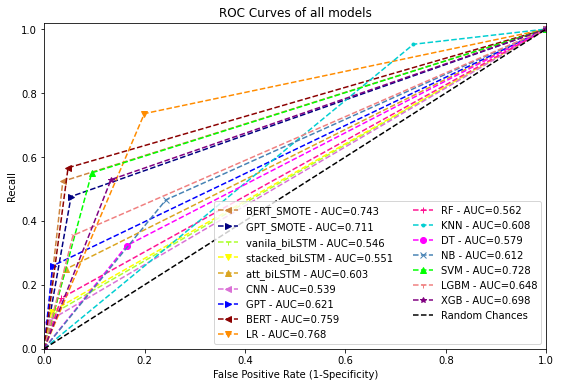

In [ ]:
graph_multi_ROC(rocs)

# **Compare models in terms of AUC scores**

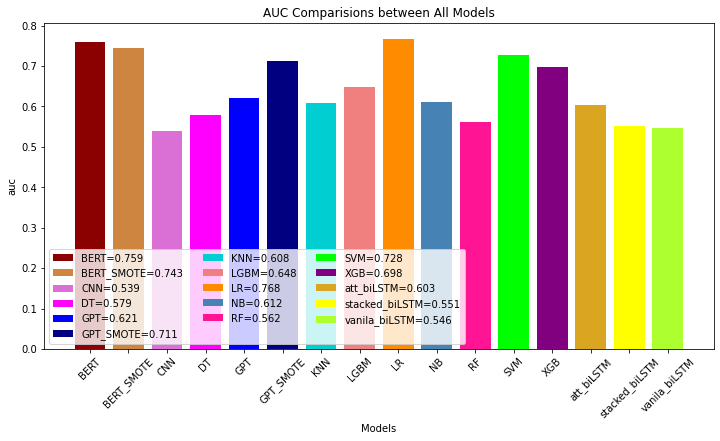

In [ ]:
plot_bar_chart(rocs, 'auc')

# **Compare models in terms of accuracies**

Out of all the models, BERT with SMOTE yields the highest accuracy (0.921), while KNN yields the lowest accuracy (0.329). 

In terms of pretrained model, using SMOTE in BERT improve the accuracy by 0.005, which is not significant. Yet, using SMOTE in GPT actually lower down its accuracy by an unsignificant amount of 0.013. 

The performances of  different variants of biLSTM are very similar to each other, in terms of accuracy. Stacked biLSTM achieves the highest accuracy in this group (0.904). Yet, the vanila version performs similarly to the stacked version, with the accuracy difference of 0.005. The attention variant of the LSTM group performs worst with 0.891 accuracy. 

In terms of the classic ML models, RF outperforms the rest with an accuracy of 0.89, while KNN underperforms the rest with an accuracy of 0.329.

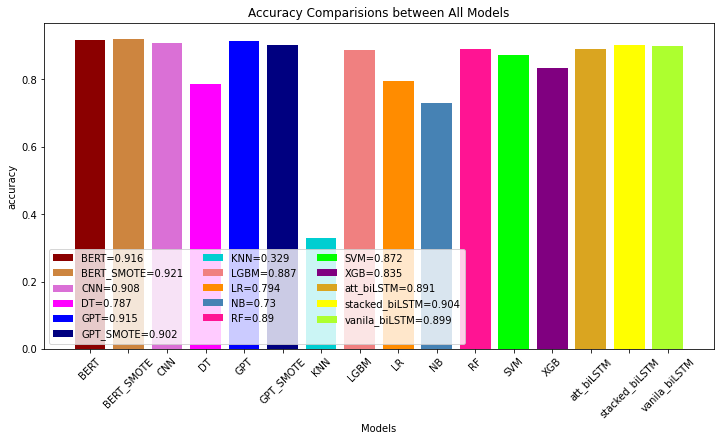

In [ ]:
plot_bar_chart(rocs, 'accuracy')

# **Compare models in terms of macro-F1 scores**

As this dataset is very imbalanced, the performance on the major class (negative) can outweight the performance on the minor class (positive). Therefore, it is beter to use macro-F1 to evaluate and compare the models. BERT with SMOTE yields the highest macro-F1 score, yet it is not significantly different from BERT's macro-F1 score. On the other hand, KNN generates the lowest macro-F1 score of only 0.314. 

In the pretrained group, BERT with SMOTE outperform the rest. In the biLSTM group, the model with attention generates the highest macro-F1 score, while the vanila version generates the lowest macro-F1 score. As for the classic ML group, KNN generates the lowest macro-F1 score, while SVM generates the highest macro-F1 score.

Based on these insights, using BERT in this dataset for binary classification (task 1) generates the highest result, while using KNN generates the lowest result. 

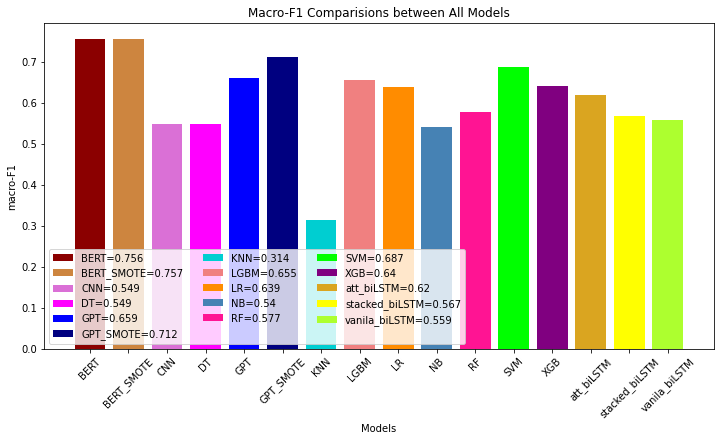

In [ ]:
plot_bar_chart(rocs, 'macro-F1')